Multi-fidelity Modeling and Experimental Design (Active Learning)

In [1]:
# General imports

import numpy as np
np.random.seed(20)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
import sys
import os
sys.path.append('../utilities')
import multi_fidelity_surrogate_model as mfsm

In [2]:
version_in = 'v6'
version_out = 'v6'
if not os.path.exists(f'out/{version_out}'):
   os.makedirs(f'out/{version_out}')
labels=['Radius[cm]','Thickness[cm]','NPanels', 'Theta[deg]', 'Length[cm]']
xmin=[0,0,5,0,0]
xmax=[265,20,360,45,150]

xlow=[90,1,4,0,1]
xhigh=[250,15,360,45,150]
factor=1.
x_fixed = [160, 5, 40, 45, 100]
LF_noise = 0.028
data2 = np.genfromtxt(f'in/Ge77_rates_{version_in}.csv',
                     dtype=None,
                     delimiter=',',
                    skip_header = 2)

data=pd.read_csv(f'in/Ge77_rates_{version_in}.csv', skiprows=1)
data[['Mode','Radius[cm]','Thickness[cm]','NPanels', 'Theta[deg]', 'Length[cm]','Ge77-Rate[nucleus/(kg yr)]','Ge77-Rate_err_stat[nucleus/(kg yr)]']]


 /var/folders/99/0svbmlns6xs9l9p55lcr912r0000gn/T/ipykernel_17380/839614134.py:14: VisibleDeprecationWarning:Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


,Mode,Radius[cm],Thickness[cm],NPanels,Theta[deg],Length[cm],Ge77-Rate[nucleus/(kg yr)],Ge77-Rate_err_stat[nucleus/(kg yr)]
0,LF,124.0,16.0,196.0,18.0,3.0,0.157468,0.025659
1,LF,200.0,7.0,230.0,27.0,134.0,0.192992,0.030084
2,LF,139.0,8.0,95.0,4.0,17.0,0.130581,0.023381
3,LF,198.0,7.0,357.0,28.0,45.0,0.176968,0.027833
4,LF,116.0,11.0,67.0,7.0,144.0,0.125613,0.023194
...,...,...,...,...,...,...,...,...
301,LF,200.0,10.0,360.0,0.0,3.5,0.168672,0.027174
302,LF,0.0,0.0,0.0,0.0,0.0,0.308966,0.035791
303,HF,0.0,0.0,360.0,0.0,0.0,0.274066,0.009791
304,HF,95.0,10.0,360.0,0.0,0.0,0.174946,0.008197


In [3]:

x_train_l, x_train_h, y_train_l, y_train_h = ([],[],[],[])
row_h=data.index[data['Mode'] == 'HF'].tolist()
row_l=data.index[data['Mode'] == 'LF'].tolist()
for i in row_h:
        x_train_h.append([data.iloc[i]['Radius[cm]'],data.iloc[i]['Thickness[cm]'],data.iloc[i]['NPanels'],data.iloc[i]['Theta[deg]'],data.iloc[i]['Length[cm]']])
        y_train_h.append(data.iloc[i]['Ge77-Rate[nucleus/(kg yr)]'])

for i in row_l:
        x_train_l.append([data.iloc[i]['Radius[cm]'],data.iloc[i]['Thickness[cm]'],data.iloc[i]['NPanels'],data.iloc[i]['Theta[deg]'],data.iloc[i]['Length[cm]']])
        y_train_l.append(data.iloc[i]['Ge77-Rate[nucleus/(kg yr)]'])

x_train_l, x_train_h, y_train_l, y_train_h = (np.atleast_2d(x_train_l), np.atleast_2d(x_train_h), np.atleast_2d(y_train_l).T, np.atleast_2d(y_train_h).T)



In [4]:
mf_model = mfsm.linear_multi_fidelity_model(x_train_l, y_train_l,x_train_h, y_train_h, LF_noise)

 /Users/aschuetz/.local/modules/miniconda/miniconda3/envs/legend/lib/python3.10/site-packages/GPy/core/gp.py:85: UserWarning:Your kernel has a different input dimension 2 then the given X dimension 6. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel
 /Users/aschuetz/.local/modules/miniconda/miniconda3/envs/legend/lib/python3.10/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


Optimization restart 1/20, f = -251.87239507442814
Warning - optimization restart 2/20 failed
Warning - optimization restart 3/20 failed
Warning - optimization restart 4/20 failed
Warning - optimization restart 5/20 failed
Warning - optimization restart 6/20 failed
Warning - optimization restart 7/20 failed
Warning - optimization restart 8/20 failed
Warning - optimization restart 9/20 failed
Warning - optimization restart 10/20 failed
Warning - optimization restart 11/20 failed
Warning - optimization restart 12/20 failed
Warning - optimization restart 13/20 failed
Warning - optimization restart 14/20 failed
Warning - optimization restart 15/20 failed
Warning - optimization restart 16/20 failed
Warning - optimization restart 17/20 failed
Warning - optimization restart 18/20 failed
Warning - optimization restart 19/20 failed
Warning - optimization restart 20/20 failed


 /Users/aschuetz/.local/modules/miniconda/miniconda3/envs/legend/lib/python3.10/site-packages/GPy/core/__init__.py:80: FutureWarning:In the future `np.bool` will be defined as the corresponding NumPy scalar.


In [5]:

leg_label = []
fig1 = [plt.figure(figsize=(12,8)) for i in range(len(xlow))]
fig2 = [plt.figure(figsize=(12,8)) for i in range(len(xlow))]


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Sample # 0
Sample # 1
Adding HF sample at [[222.6   6.9 186.   43.4  59.6   1. ]] with Ge-77 Rate of [[0.14555472]]
Adding LF sample at [[222.6   6.9 186.   43.4  59.6   1. ]] with Ge-77 Rate of [[0.20640846]]
Sample # 2
Adding HF sample at [[143.7  12.6 109.    8.6  73.2   1. ]] with Ge-77 Rate of [[0.11928417]]
Adding LF sample at [[143.7  12.6 109.    8.6  73.2   1. ]] with Ge-77 Rate of [[0.13841772]]


 /Users/aschuetz/Documents/Analysis/legend/ML/legend-multi-fidelity-surrogate-model/surrogate-model/multi_fidelity_surrogate_model.py:254: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


Sample # 3
Adding HF sample at [[242.2  10.7  66.    6.4  22.3   1. ]] with Ge-77 Rate of [[0.17414715]]
Adding LF sample at [[242.2  10.7  66.    6.4  22.3   1. ]] with Ge-77 Rate of [[0.14493815]]


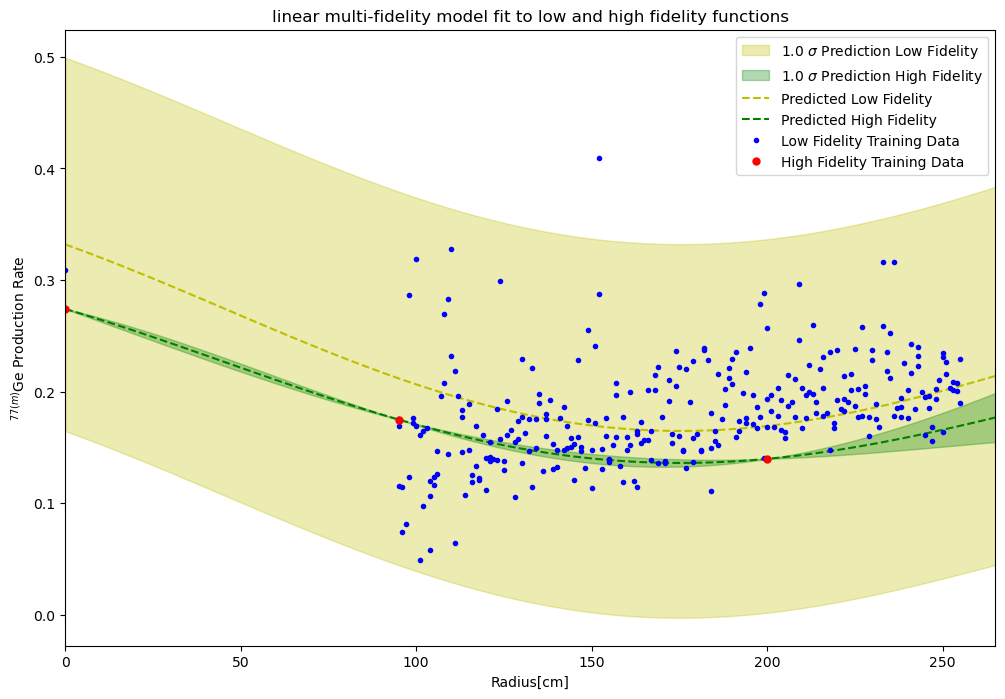

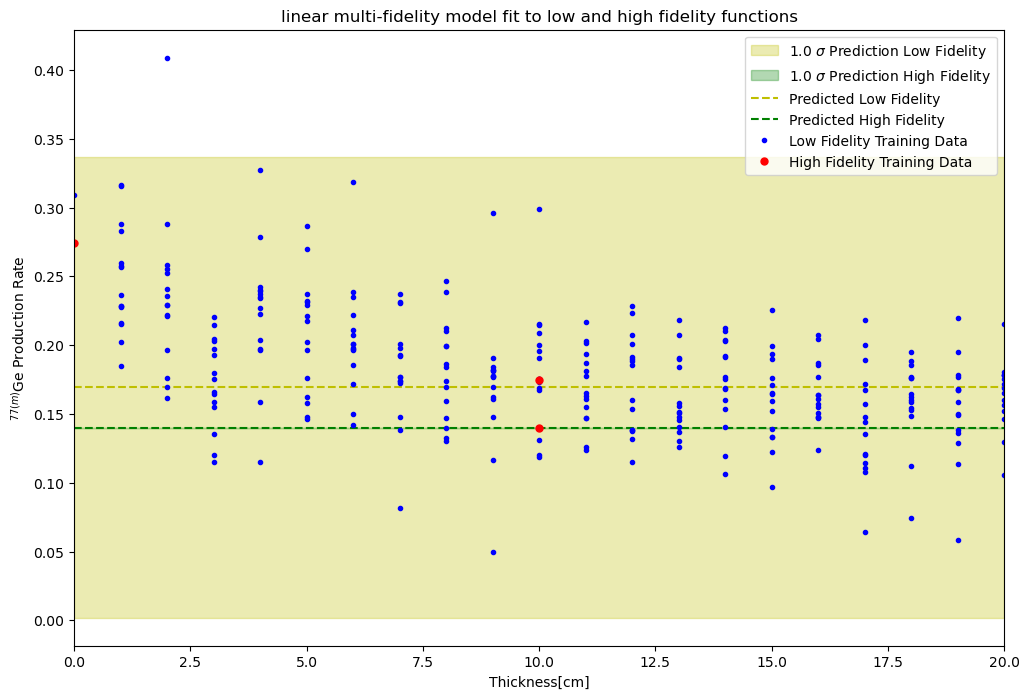

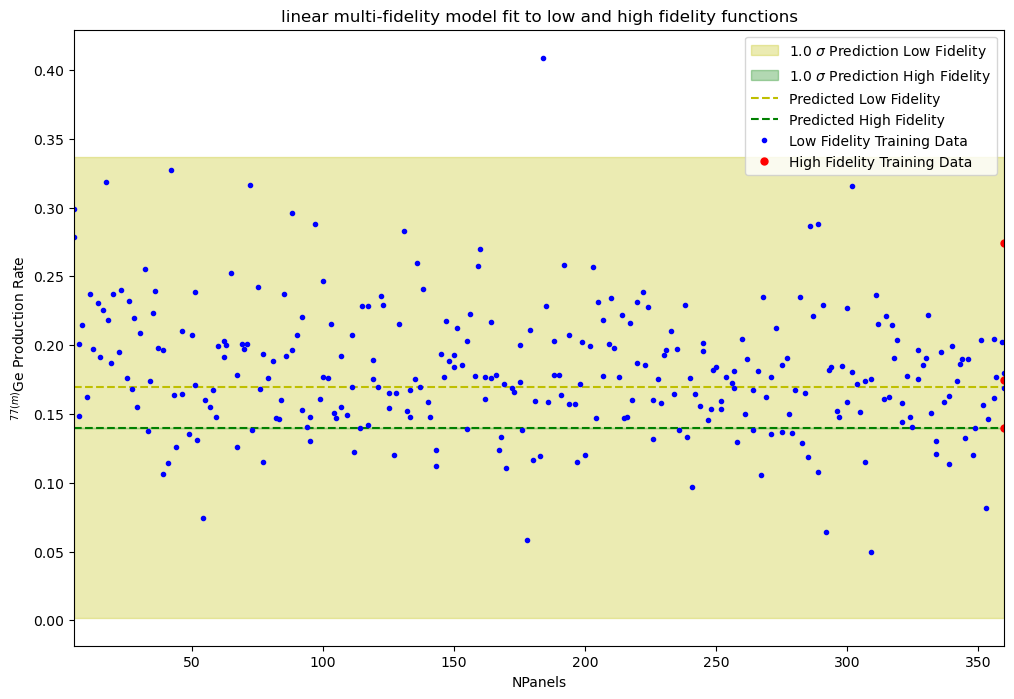

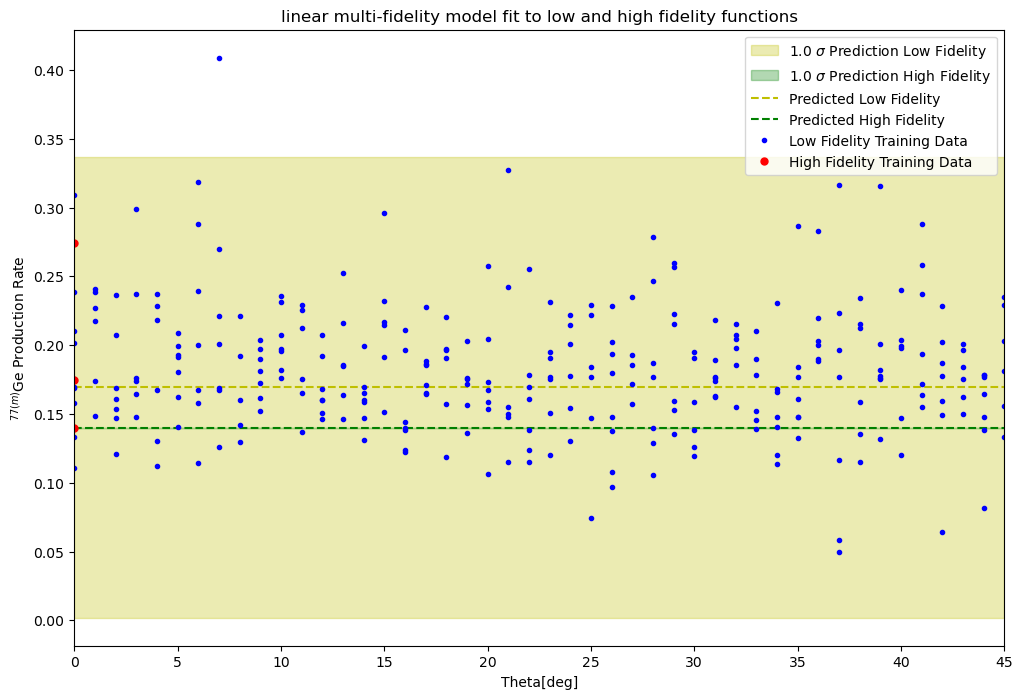

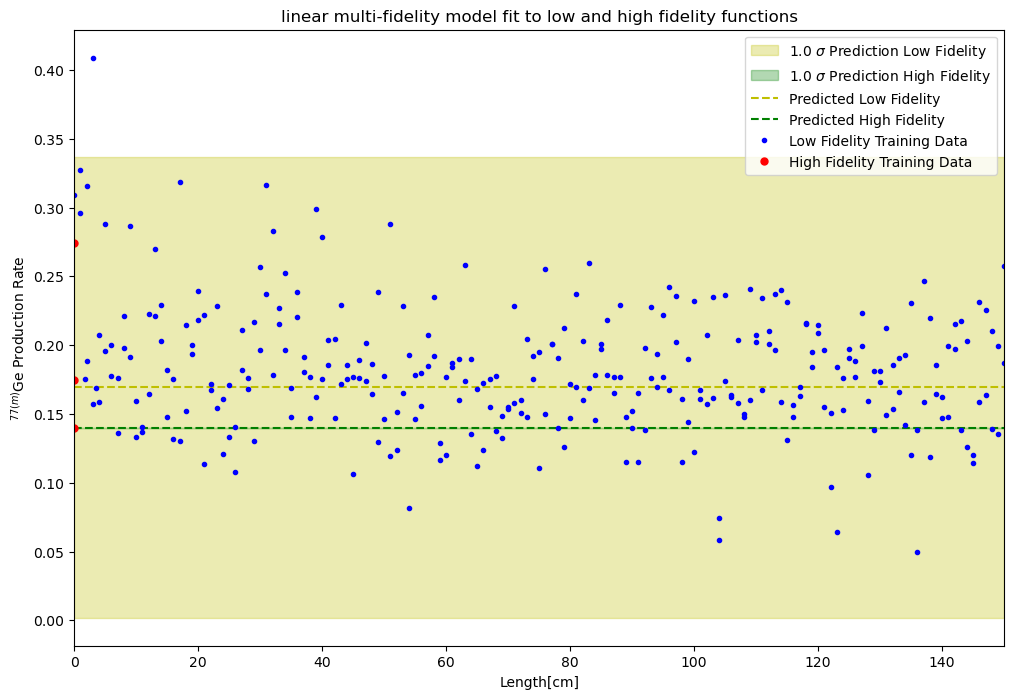

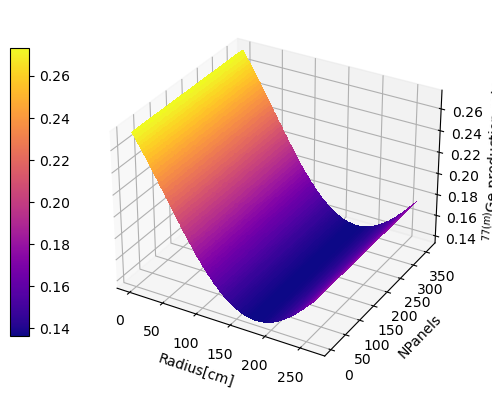

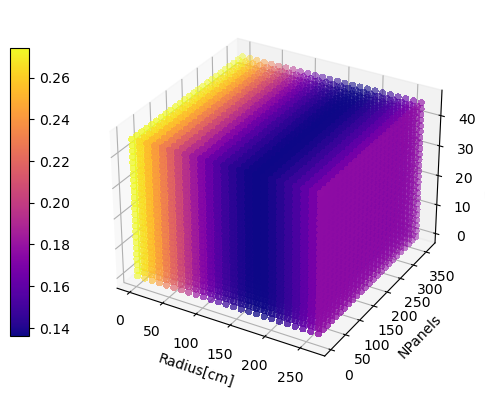

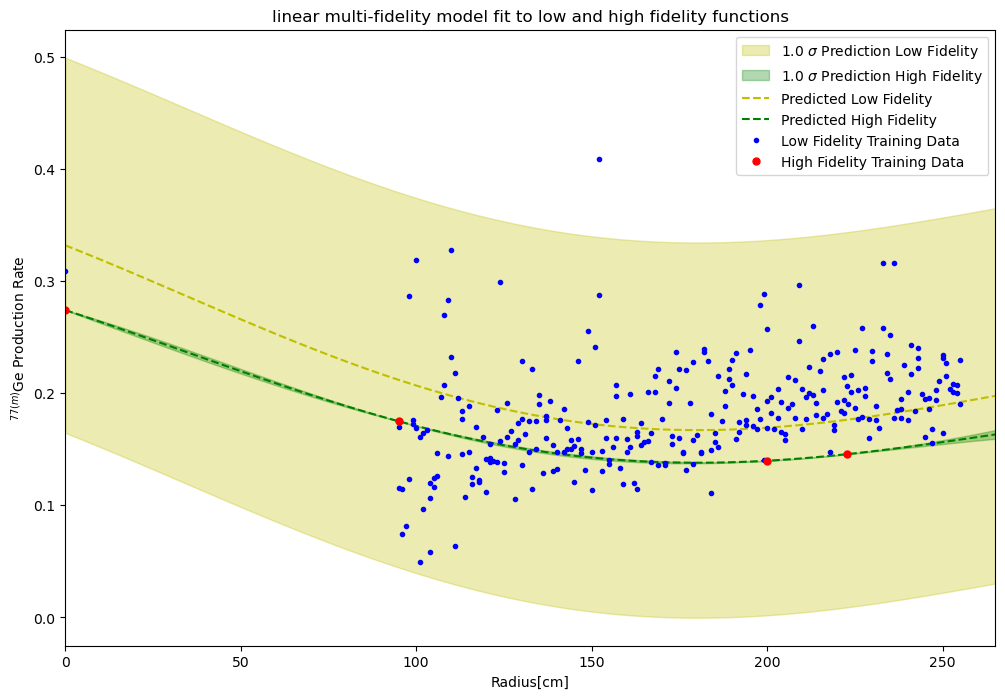

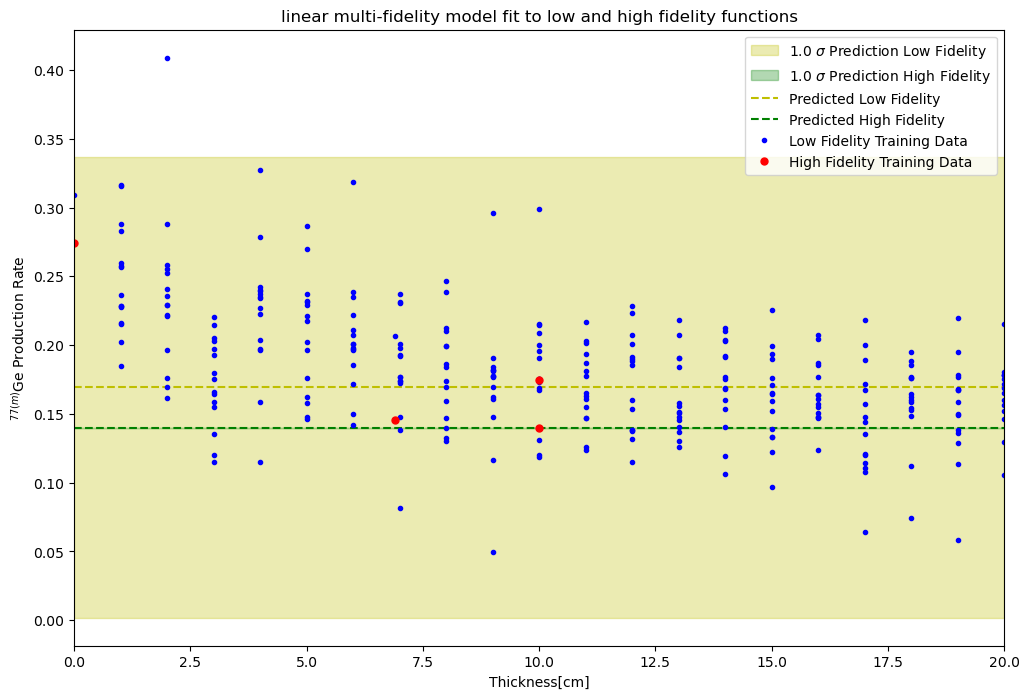

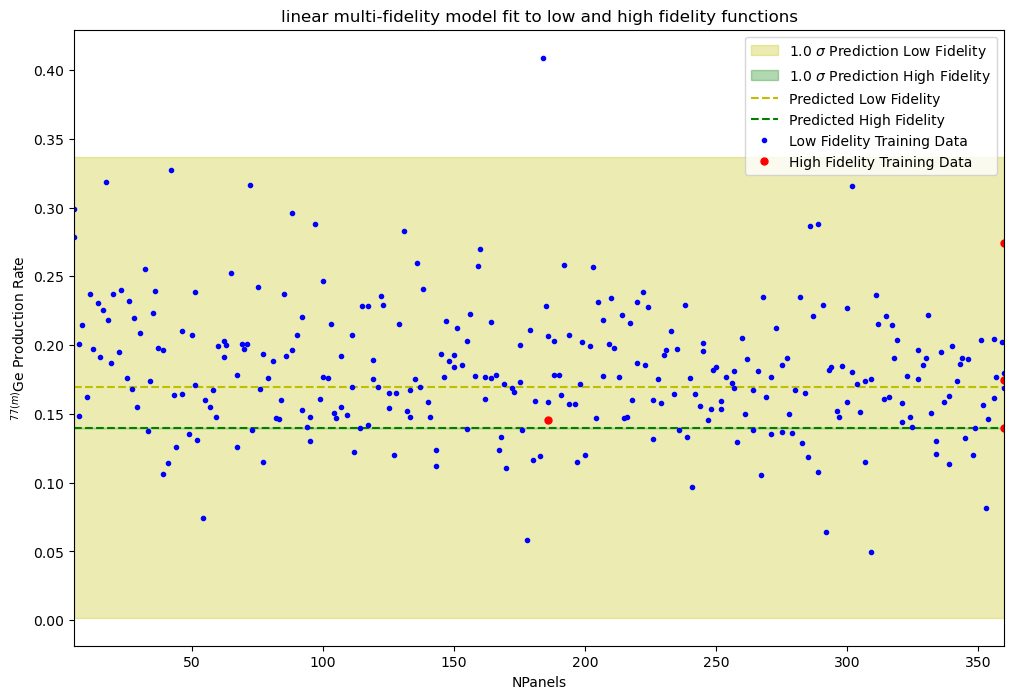

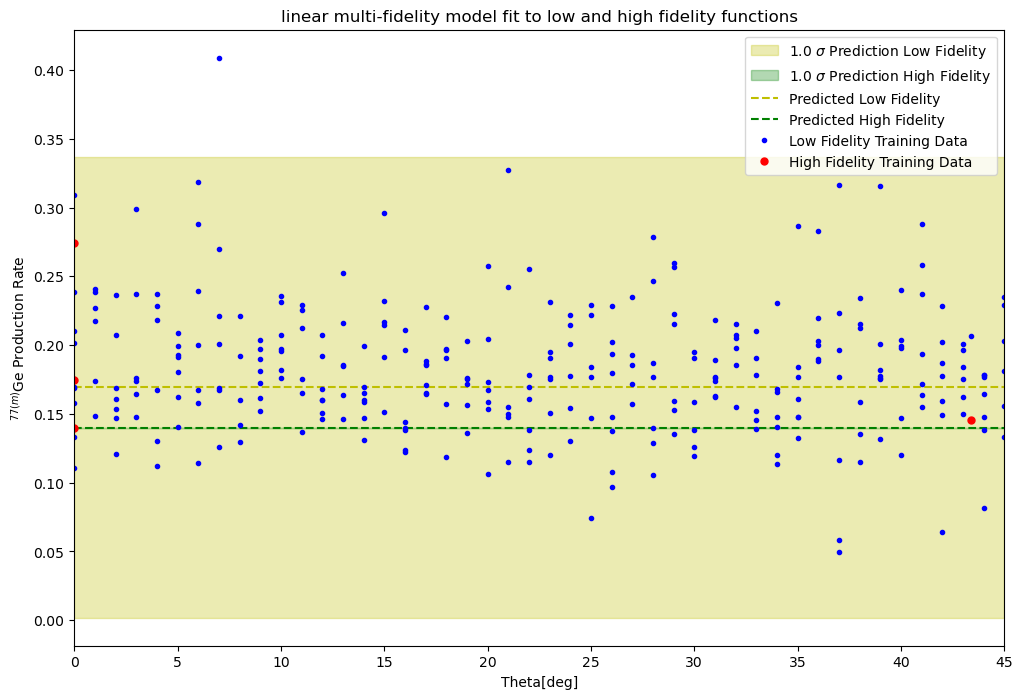

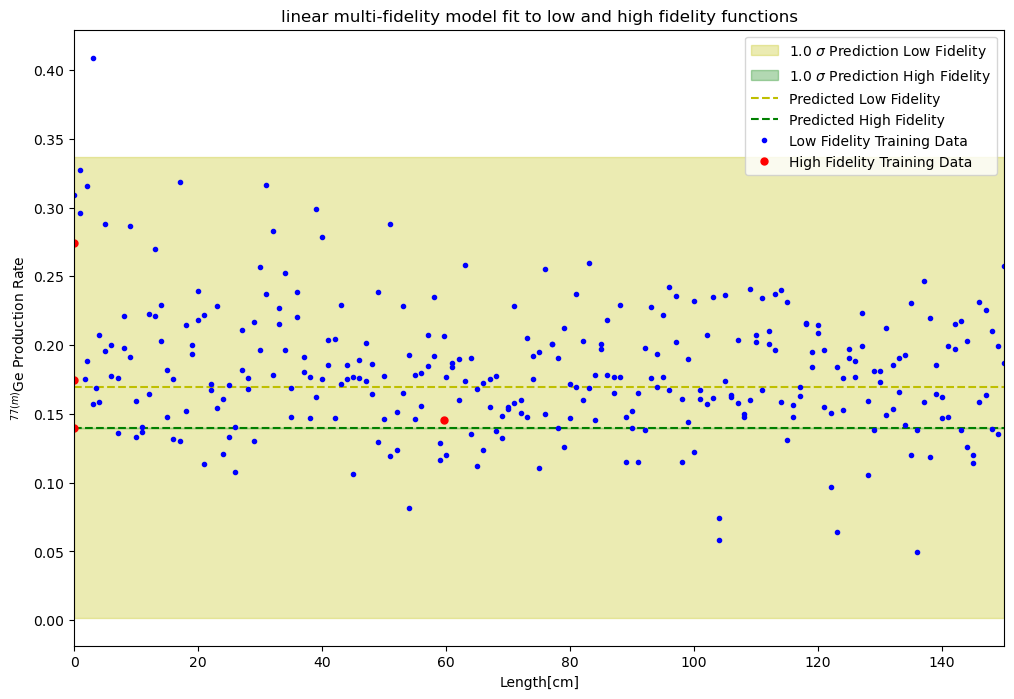

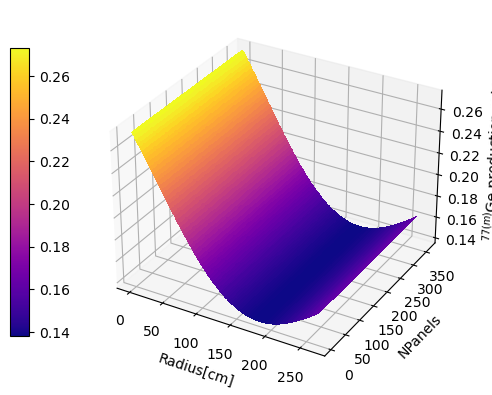

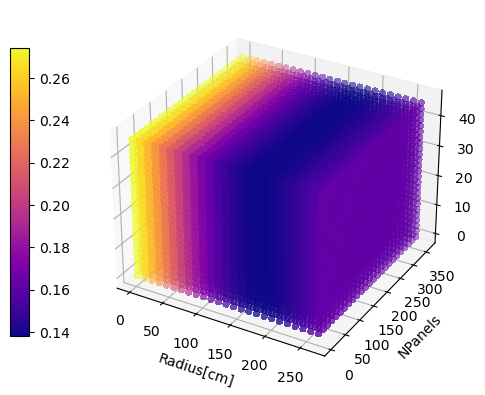

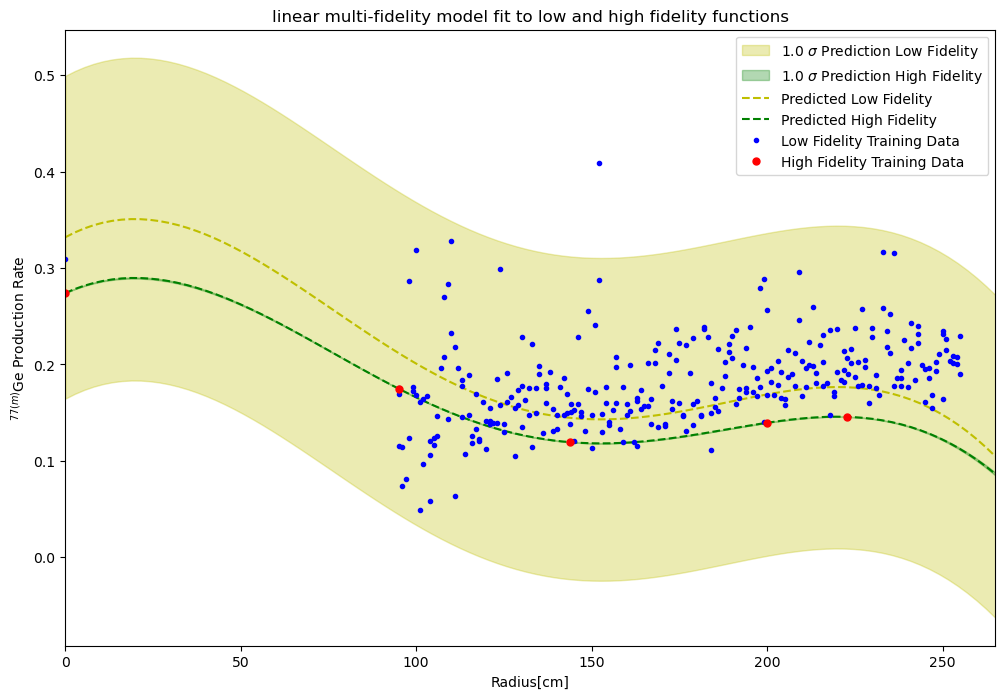

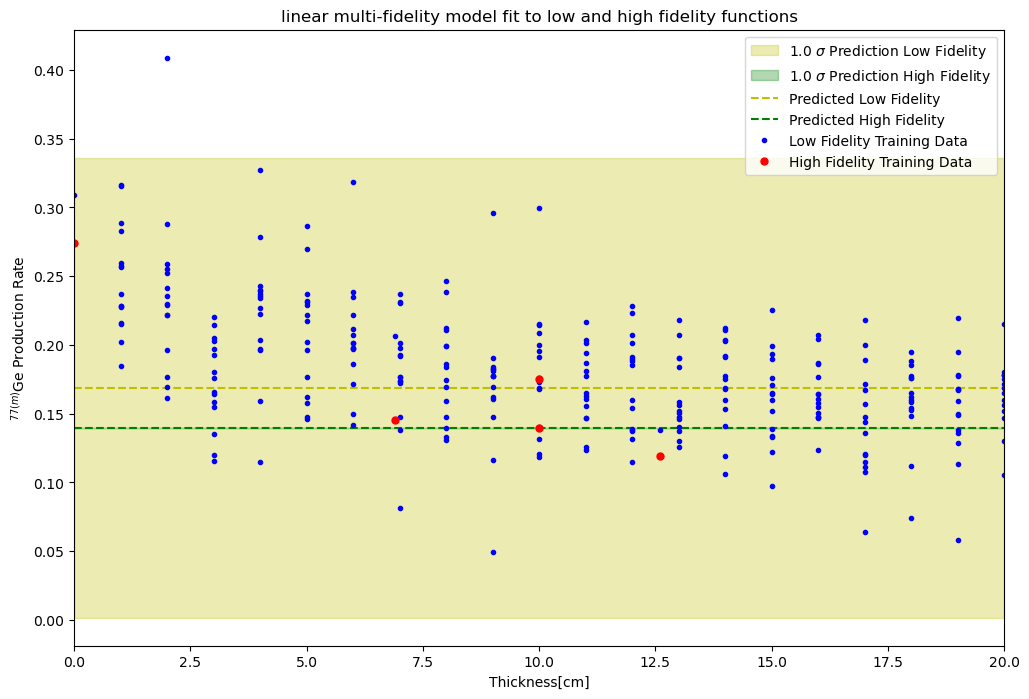

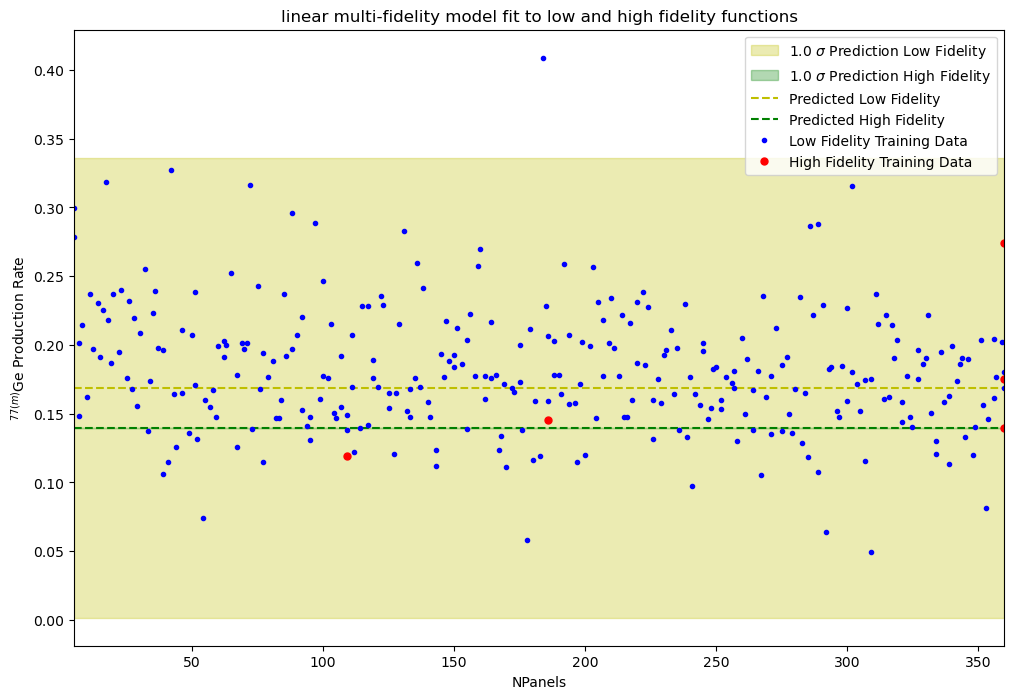

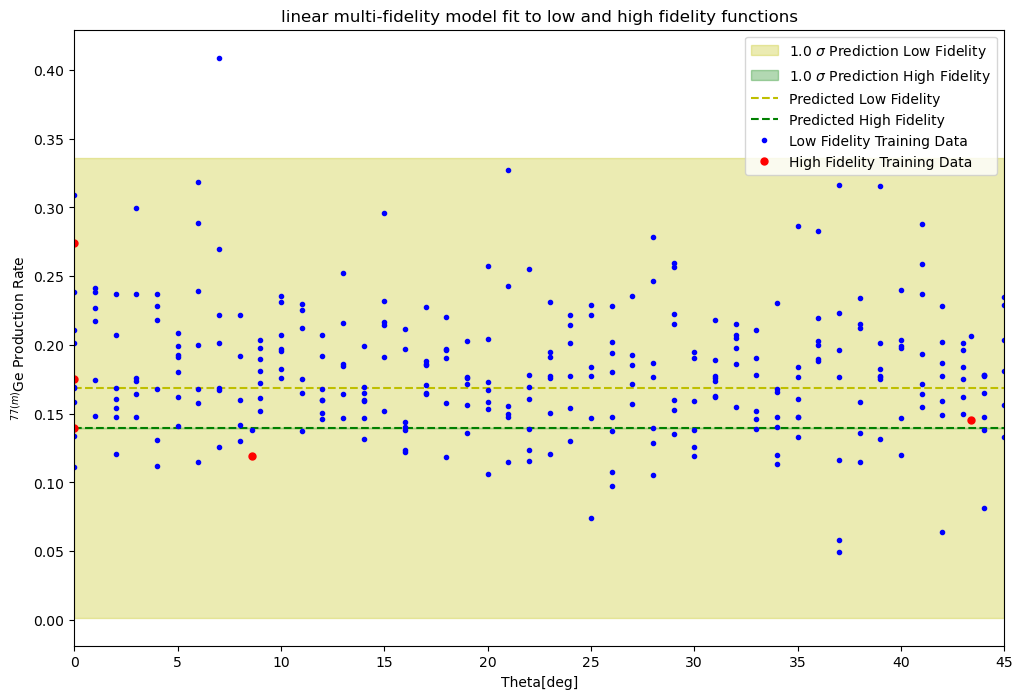

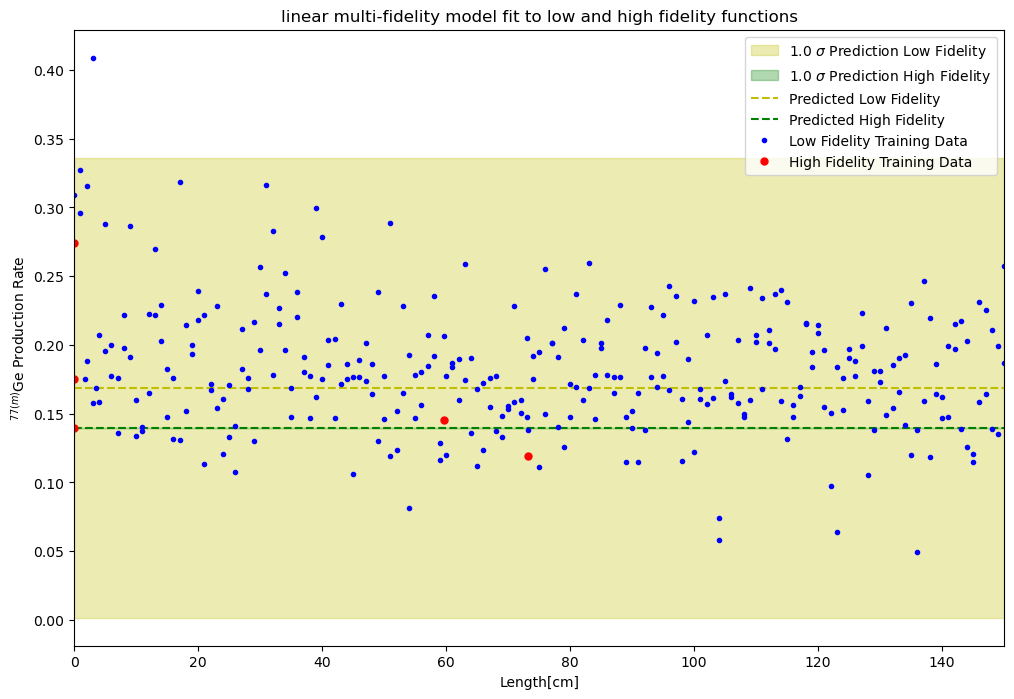

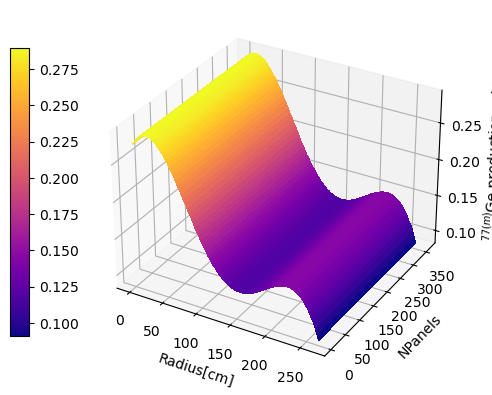

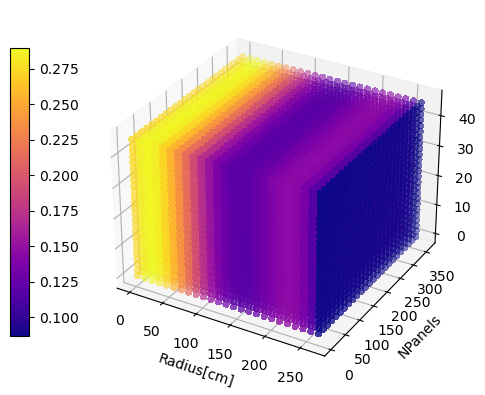

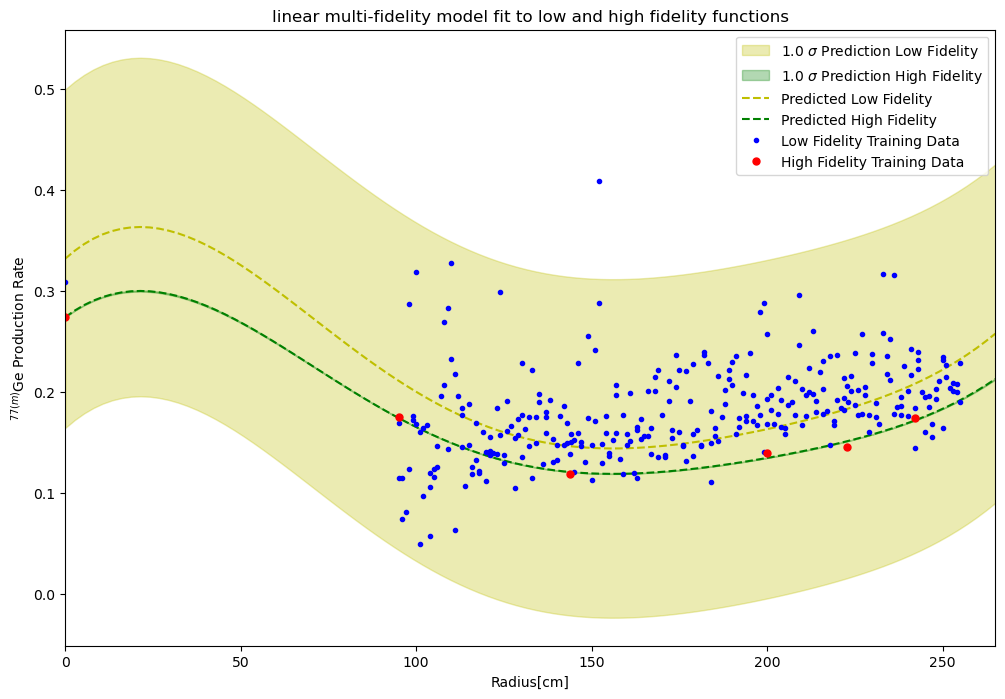

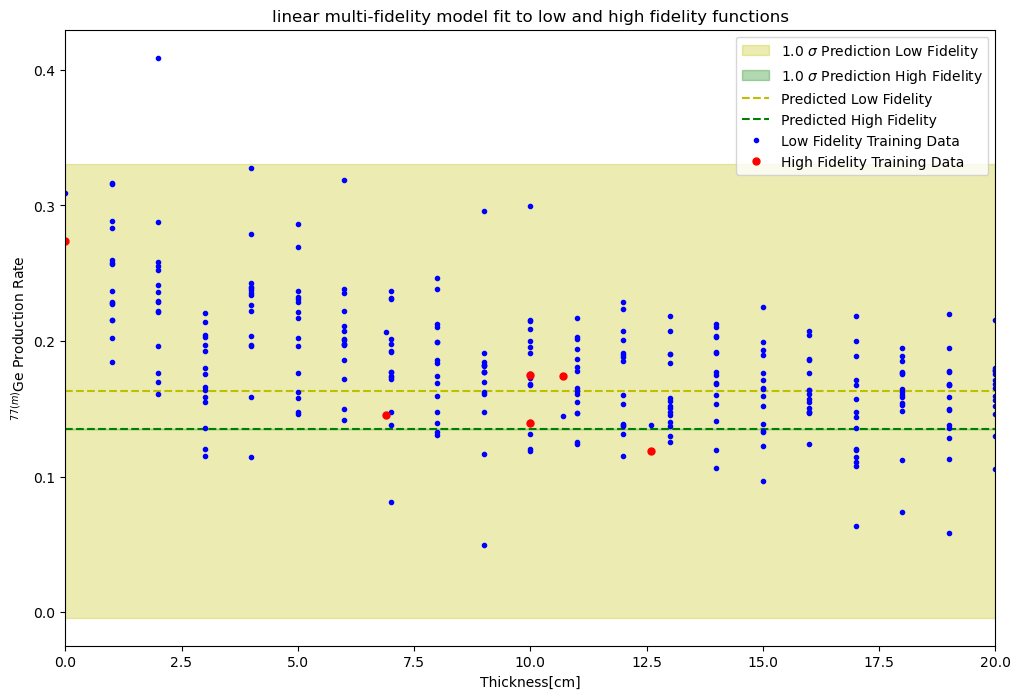

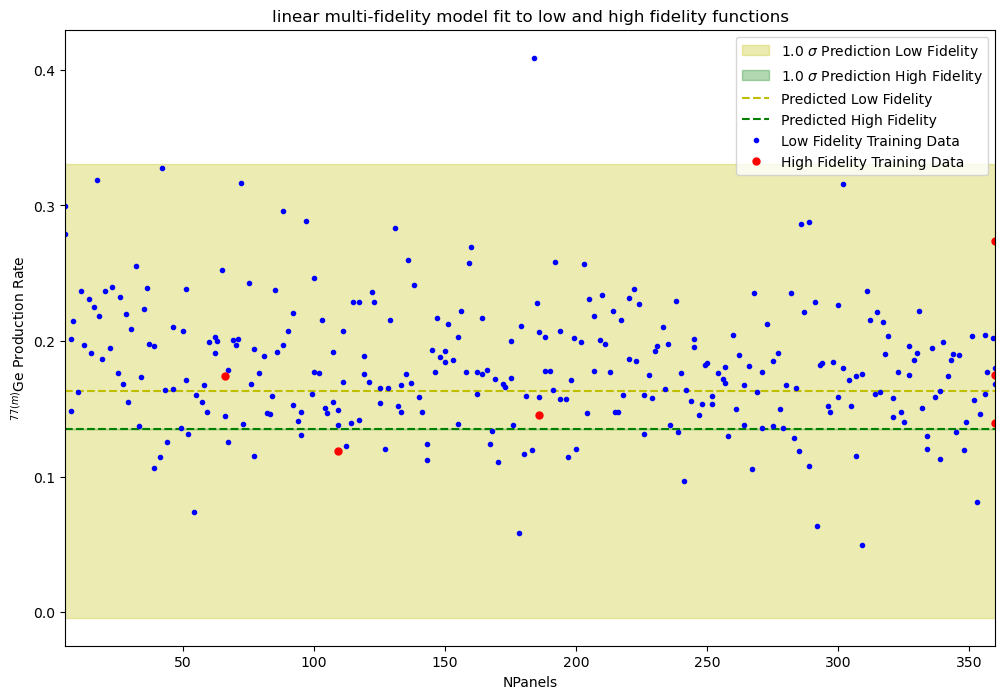

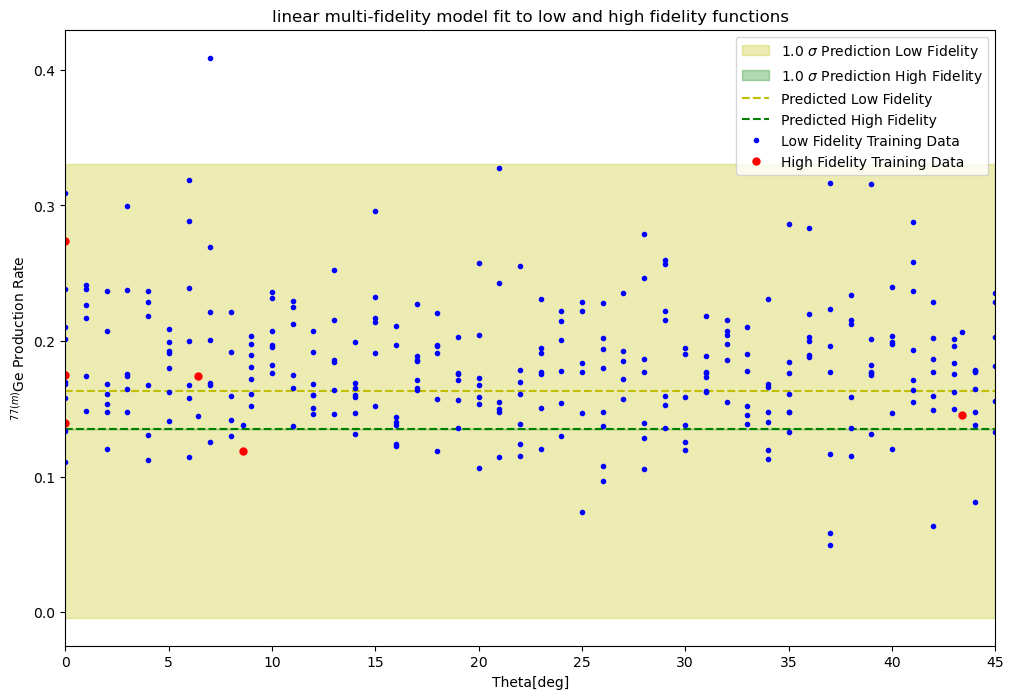

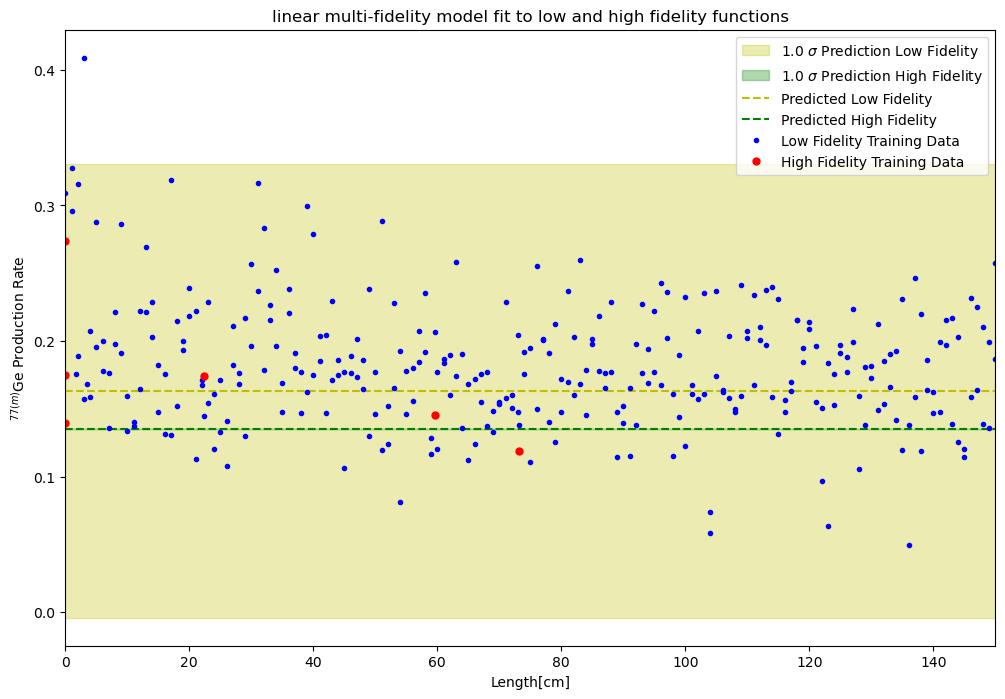

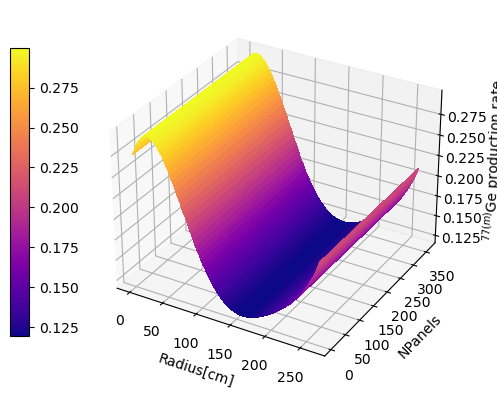

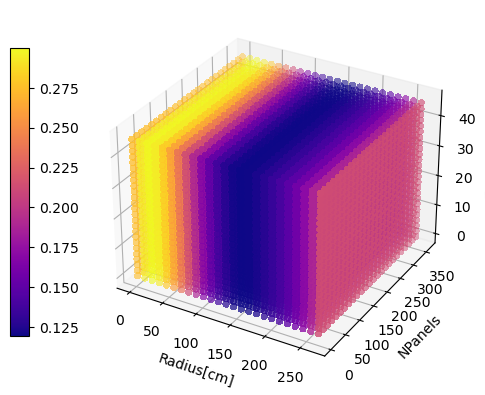

In [6]:
add_new_sample=True
sample=0
total_samples=10

while ( sample < total_samples and sample <= mfsm.GetNumberOfNewSamples(version_out)[0] ):
    print('Sample #', sample)
    #x_train_l, y_train_l, x_train_h, y_train_h, mf_model, fig1, fig2 = mfsm.ActiveLearning(x_train_l, y_train_l, x_train_h, y_train_h, mf_model, xmin, xmax, xlow, xhigh, labels, factor, fig1, fig2, version_out, x_fixed, sample)
    x_train_l, y_train_l, x_train_h, y_train_h, mf_model, fig1, fig2 = mfsm.ActiveLearningModelOnly(x_train_l, y_train_l, x_train_h, y_train_h, mf_model, xmin, xmax, xlow, xhigh, labels, factor, fig1, fig2, version_out, x_fixed, sample)
    leg_label.extend([f"updated acquisition func ({sample})",r'$x_{new}$'])
    sample+=1





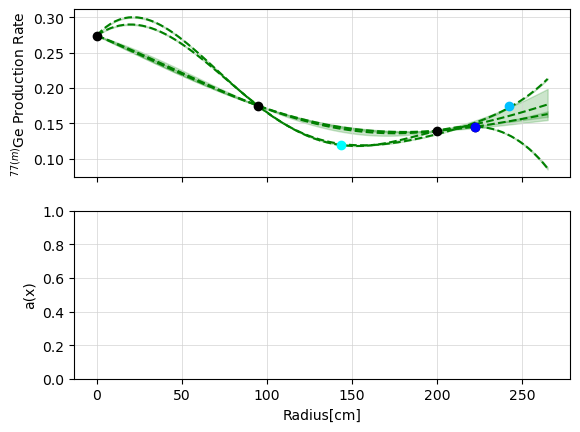

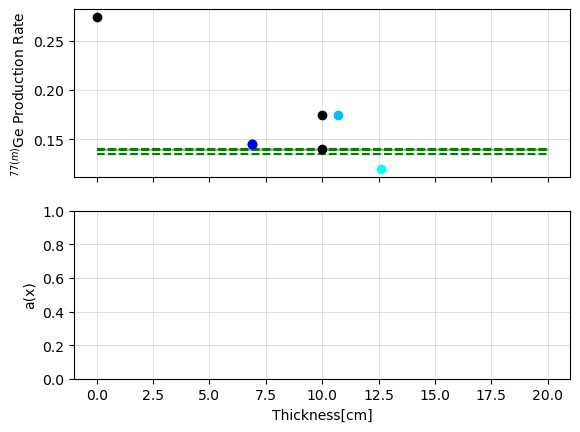

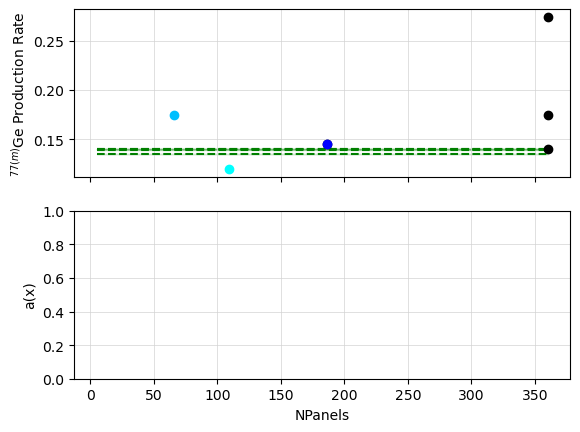

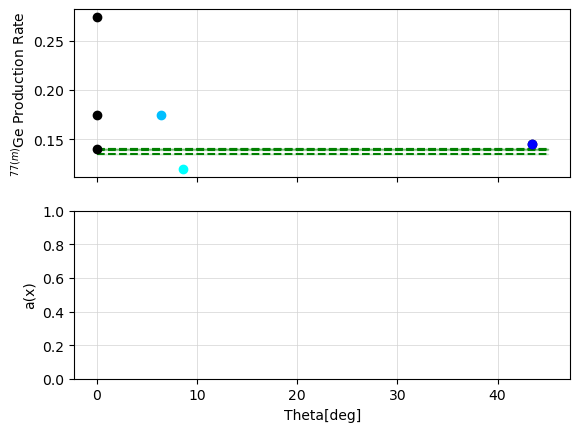

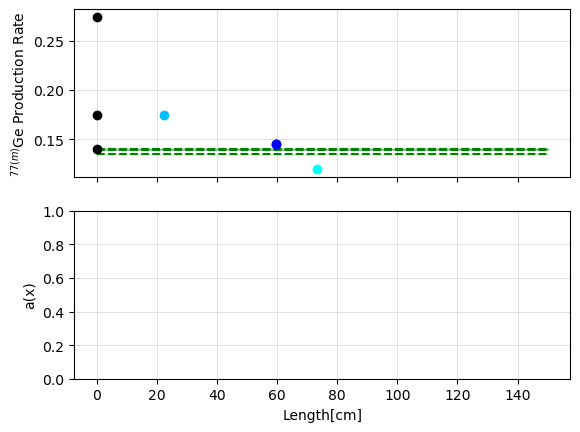

In [7]:

for i in range(len(xmin)):
    mfsm.DrawModelAcquisitionFunction(fig1,fig2,i,labels[i],version_out)